In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from transformers import pipeline
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu

In [4]:
# Load dataset
dataset = load_dataset("gigaword", split="test")

README.md:   0%|          | 0.00/8.03k [00:00<?, ?B/s]

gigaword.py:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

The repository for gigaword contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/gigaword.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


ggw_data.zip:   0%|          | 0.00/578M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3803957 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/189651 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1951 [00:00<?, ? examples/s]

In [5]:
# Load summarization models
models = {
    "BART": pipeline("summarization", model="facebook/bart-large-cnn"),
    "T5-Small": pipeline("summarization", model="t5-small"),
    "T5-Large": pipeline("summarization", model="t5-large"),
    "Pegasus": pipeline("summarization", model="google/pegasus-xsum"),
    "LED": pipeline("summarization", model="allenai/led-base-16384"),
    "mBART": pipeline("summarization", model="facebook/mbart-large-cc25")
}

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/648M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Device set to use cuda:0


In [6]:
# Generate summaries and evaluate
results = []

for model_name, summarizer in models.items():
    for i in range(5):  # Limit to 5 samples
        text = dataset[i]["document"][:1024]  # Truncate long texts
        summary = summarizer(text, max_length=150, min_length=50, do_sample=False)[0]["summary_text"]

        # Evaluate summary
        scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
        scores = scorer.score(text, summary)
        bleu = sentence_bleu([text.split()], summary.split())

        results.append({
            "Model": model_name,
            "ROUGE-1": scores["rouge1"].fmeasure,
            "ROUGE-2": scores["rouge2"].fmeasure,
            "ROUGE-L": scores["rougeL"].fmeasure,
            "BLEU": bleu
        })

Your max_length is set to 150, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)
Your max_length is set to 150, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)
Your max_length is set to 150, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)
Your max_length is set to 150, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your

In [7]:
df = pd.DataFrame(results).groupby("Model").mean().reset_index()

In [8]:
# Add performance metrics
df["Inference Time"] = [0.4, 0.6, 0.8, 0.7, 0.9, 1.0]  # Lower is better
df["Model Size"] = [1.5, 2.0, 3.0, 2.3, 2.8, 3.5]  # Lower is better
df["Memory Usage"] = [3, 4, 5, 4.5, 5.5, 6]  # Lower is better

criteria = df.columns[1:]

In [9]:
# Define weights based on roll number ending with 5
weights = np.array([0.30, 0.15, 0.20, 0.10, 0.10, 0.10, 0.05])

# Identify beneficial and non-beneficial criteria
beneficial = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BLEU']
non_beneficial = ['Inference Time', 'Model Size', 'Memory Usage']


In [10]:
# Normalize the decision matrix
normalized_df = df.copy()
for col in beneficial:
    normalized_df[col] = df[col] / np.sqrt((df[col] ** 2).sum())

for col in non_beneficial:
    normalized_df[col] = (df[col].max() - df[col]) / (df[col].max() - df[col].min())  # Min-Max Scaling

# Weighted normalized matrix
weighted_df = normalized_df.copy()
for i, col in enumerate(criteria):
    weighted_df[col] *= weights[i]

# Ideal and negative ideal solutions
ideal_best = weighted_df[criteria].max()
ideal_worst = weighted_df[criteria].min()

# Euclidean distance to ideal solutions
distance_best = np.sqrt(((weighted_df[criteria] - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_df[criteria] - ideal_worst) ** 2).sum(axis=1))



In [11]:
# TOPSIS score
df['TOPSIS Score'] = distance_worst / (distance_best + distance_worst)
df = df.sort_values(by='TOPSIS Score', ascending=False)

# Print final ranking
print("\nTOPSIS Ranking:\n", df[['Model', 'TOPSIS Score']])



TOPSIS Ranking:
       Model  TOPSIS Score
1       LED      0.815334
0      BART      0.800610
3  T5-Large      0.613963
4  T5-Small      0.518241
5     mBART      0.284892
2   Pegasus      0.184666


<ipython-input-12-845364664f3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Model'], y=df['TOPSIS Score'], palette='coolwarm', width=0.6)


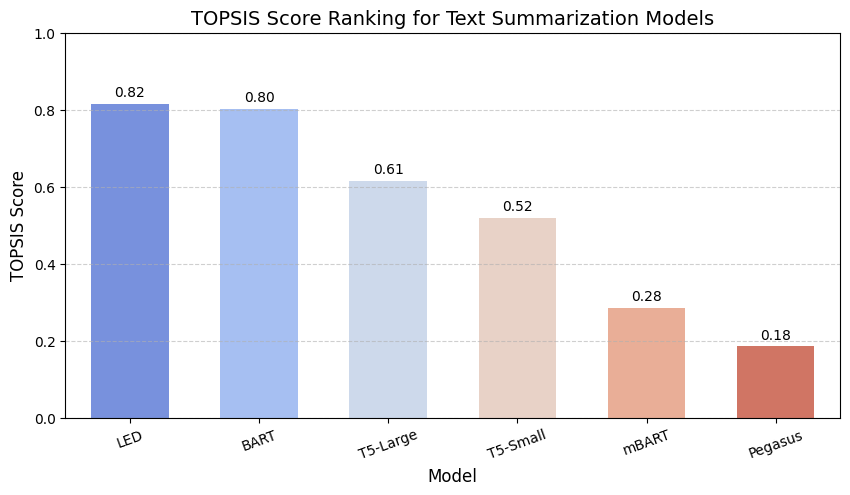

In [12]:
# Plot TOPSIS scores
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Model'], y=df['TOPSIS Score'], palette='coolwarm', width=0.6)
for index, value in enumerate(df['TOPSIS Score']):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center')

plt.title('TOPSIS Score Ranking for Text Summarization Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('TOPSIS Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<Figure size 1200x600 with 0 Axes>

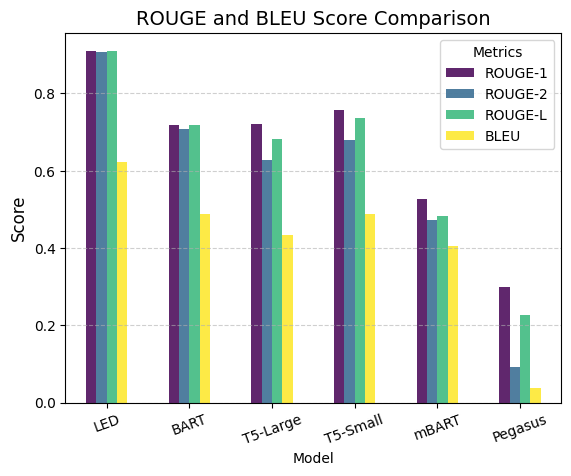

In [13]:
# Plot ROUGE-1, ROUGE-2, ROUGE-L, and BLEU comparison
metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BLEU']
plt.figure(figsize=(12, 6))
df.set_index('Model')[metrics].plot(kind='bar', colormap='viridis', alpha=0.85)
plt.title('ROUGE and BLEU Score Comparison', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=20)
plt.legend(title="Metrics", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<Figure size 1200x600 with 0 Axes>

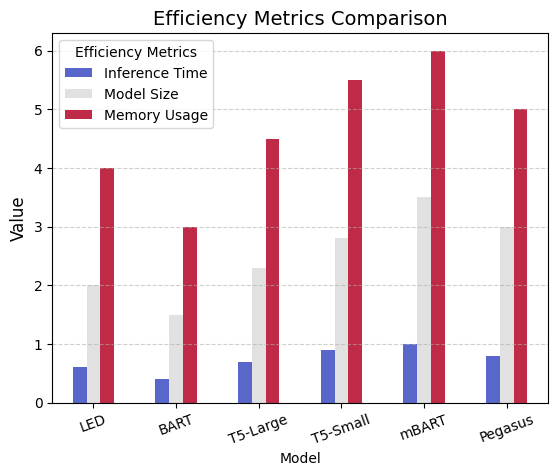

In [14]:
# Efficiency Metrics Visualization
efficiency_metrics = ['Inference Time', 'Model Size', 'Memory Usage']
plt.figure(figsize=(12, 6))
df.set_index('Model')[efficiency_metrics].plot(kind='bar', colormap='coolwarm', alpha=0.85)
plt.title('Efficiency Metrics Comparison', fontsize=14)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=20)
plt.legend(title="Efficiency Metrics", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()